Choose the correct environment with all the dependencies install

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import mahalanobis
from scipy.stats import zscore
import seaborn as sns
from sklearn.metrics import silhouette_score
import pyvista as pv

In [2]:
# Directory containing saved occupancy grids
occupancy_dir = "/Users/User/Documents/Project_JEB/JEB_Data/SimJEB_Occupancy_Grids/"

# Load all occupancy grids
occupancy_files = [f for f in os.listdir(occupancy_dir) if f.endswith(".npy")]
occupancy_data = []

# Find the largest grid shape
max_shape = (0, 0, 0)  # Placeholder for (x, y, z) dimensions
for file in occupancy_files:
    grid = np.load(os.path.join(occupancy_dir, file))
    max_shape = tuple(max(s1, s2) for s1, s2 in zip(max_shape, grid.shape))

# Function to pad grids to max_shape
def pad_grid(grid, max_shape):
    pad_width = [(0, max_s - s) for s, max_s in zip(grid.shape, max_shape)]
    return np.pad(grid, pad_width, mode='constant', constant_values=0)

# Load and pad grids
for file in occupancy_files:
    grid = np.load(os.path.join(occupancy_dir, file))
    padded_grid = pad_grid(grid, max_shape)
    occupancy_data.append(padded_grid.flatten())  # Flatten to 1D vector

occupancy_data = np.array(occupancy_data)  # Convert to 1D NumPy array

# Perform PCA
pca = PCA(n_components=100)  # Reduce to 3D for visualization
principal_components = pca.fit_transform(occupancy_data)
# Explained variance ratio per component
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

In [3]:
# Print explained variance for each component
print("\nExplained Variance by Component:")
for i, variance in enumerate(explained_variance):
    print(f"PC{i+1}: {variance:.4f}")


Explained Variance by Component:
PC1: 0.1521
PC2: 0.0797
PC3: 0.0473
PC4: 0.0305
PC5: 0.0284
PC6: 0.0221
PC7: 0.0205
PC8: 0.0169
PC9: 0.0157
PC10: 0.0144
PC11: 0.0135
PC12: 0.0131
PC13: 0.0114
PC14: 0.0111
PC15: 0.0104
PC16: 0.0099
PC17: 0.0093
PC18: 0.0088
PC19: 0.0084
PC20: 0.0076
PC21: 0.0073
PC22: 0.0072
PC23: 0.0070
PC24: 0.0067
PC25: 0.0064
PC26: 0.0061
PC27: 0.0059
PC28: 0.0058
PC29: 0.0056
PC30: 0.0054
PC31: 0.0053
PC32: 0.0050
PC33: 0.0050
PC34: 0.0048
PC35: 0.0047
PC36: 0.0045
PC37: 0.0044
PC38: 0.0043
PC39: 0.0042
PC40: 0.0041
PC41: 0.0040
PC42: 0.0039
PC43: 0.0039
PC44: 0.0038
PC45: 0.0036
PC46: 0.0036
PC47: 0.0035
PC48: 0.0034
PC49: 0.0034
PC50: 0.0034
PC51: 0.0033
PC52: 0.0032
PC53: 0.0032
PC54: 0.0032
PC55: 0.0031
PC56: 0.0031
PC57: 0.0030
PC58: 0.0029
PC59: 0.0029
PC60: 0.0028
PC61: 0.0028
PC62: 0.0027
PC63: 0.0027
PC64: 0.0027
PC65: 0.0026
PC66: 0.0026
PC67: 0.0026
PC68: 0.0026
PC69: 0.0025
PC70: 0.0025
PC71: 0.0024
PC72: 0.0024
PC73: 0.0024
PC74: 0.0024
PC75: 0.0023


In [4]:
# Print cumulative variance
print("\nCumulative Explained Variance:")
for i, cum_var in enumerate(cumulative_variance):
    print(f"PC{i+1}: {cum_var:.4f}")


Cumulative Explained Variance:
PC1: 0.1521
PC2: 0.2318
PC3: 0.2791
PC4: 0.3096
PC5: 0.3379
PC6: 0.3600
PC7: 0.3805
PC8: 0.3974
PC9: 0.4132
PC10: 0.4276
PC11: 0.4411
PC12: 0.4543
PC13: 0.4657
PC14: 0.4768
PC15: 0.4872
PC16: 0.4971
PC17: 0.5064
PC18: 0.5152
PC19: 0.5236
PC20: 0.5312
PC21: 0.5385
PC22: 0.5456
PC23: 0.5526
PC24: 0.5593
PC25: 0.5657
PC26: 0.5718
PC27: 0.5777
PC28: 0.5835
PC29: 0.5891
PC30: 0.5945
PC31: 0.5998
PC32: 0.6048
PC33: 0.6098
PC34: 0.6146
PC35: 0.6192
PC36: 0.6238
PC37: 0.6282
PC38: 0.6325
PC39: 0.6367
PC40: 0.6408
PC41: 0.6448
PC42: 0.6487
PC43: 0.6526
PC44: 0.6563
PC45: 0.6600
PC46: 0.6635
PC47: 0.6671
PC48: 0.6705
PC49: 0.6739
PC50: 0.6773
PC51: 0.6806
PC52: 0.6839
PC53: 0.6871
PC54: 0.6902
PC55: 0.6933
PC56: 0.6964
PC57: 0.6994
PC58: 0.7023
PC59: 0.7052
PC60: 0.7080
PC61: 0.7108
PC62: 0.7135
PC63: 0.7162
PC64: 0.7188
PC65: 0.7215
PC66: 0.7240
PC67: 0.7266
PC68: 0.7292
PC69: 0.7317
PC70: 0.7342
PC71: 0.7366
PC72: 0.7390
PC73: 0.7414
PC74: 0.7437
PC75: 0.7461
PC

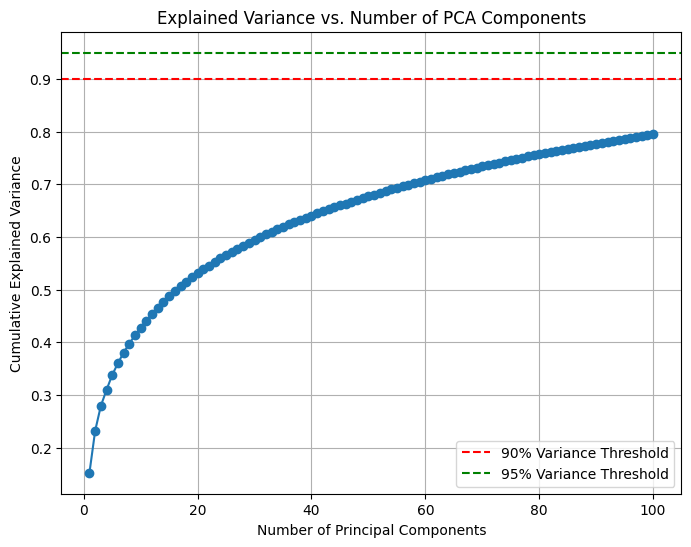

In [5]:
# Plot Explained Variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.axhline(y=0.90, color='r', linestyle="--", label="90% Variance Threshold")
plt.axhline(y=0.95, color='g', linestyle="--", label="95% Variance Threshold")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of PCA Components")
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# ------ K-Means Clustering ------
n_clusters = 2  # Adjust as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(principal_components)

# Calculate Silhouette Score
sil_score = silhouette_score(principal_components, kmeans_labels)
print(f"Silhouette Score for K-Means Clustering: {sil_score:.2f}")

# ------ Outlier Detection using Mahalanobis Distance ------
cov_matrix = np.cov(principal_components.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)
mean_vec = np.mean(principal_components, axis=0)

mahal_distances = np.array([
    mahalanobis(pc, mean_vec, inv_cov_matrix) for pc in principal_components
])

# Set threshold for outliers (Z-score > 3)
threshold = 1.5
z_scores = zscore(mahal_distances)
outliers = np.where(np.abs(z_scores) > threshold)[0]

# ------ Group Files by Cluster ------
clustered_files = {i: [] for i in range(n_clusters)}
for i, file in enumerate(occupancy_files):
    cluster = kmeans_labels[i]
    clustered_files[cluster].append(file)

# Print files in each cluster
for cluster, files in clustered_files.items():
    print(f"\nCluster {cluster} contains {len(files)} files:")
    for file in files:
        print(f"  {file}")

Silhouette Score for K-Means Clustering: 0.19

Cluster 0 contains 267 files:
  257.npy
  519.npy
  121.npy
  135.npy
  20.npy
  34.npy
  323.npy
  337.npy
  479.npy
  486.npy
  336.npy
  322.npy
  35.npy
  21.npy
  108.npy
  134.npy
  120.npy
  281.npy
  295.npy
  518.npy
  524.npy
  256.npy
  240.npy
  254.npy
  268.npy
  297.npy
  136.npy
  122.npy
  23.npy
  320.npy
  446.npy
  308.npy
  485.npy
  484.npy
  309.npy
  321.npy
  447.npy
  335.npy
  22.npy
  123.npy
  296.npy
  282.npy
  269.npy
  255.npy
  533.npy
  279.npy
  245.npy
  523.npy
  133.npy
  319.npy
  325.npy
  494.npy
  495.npy
  324.npy
  456.npy
  318.npy
  33.npy
  293.npy
  536.npy
  534.npy
  520.npy
  246.npy
  285.npy
  124.npy
  130.npy
  25.npy
  19.npy
  440.npy
  454.npy
  483.npy
  497.npy
  496.npy
  482.npy
  441.npy
  30.npy
  131.npy
  125.npy
  247.npy
  234.npy
  552.npy
  546.npy
  220.npy
  624.npy
  630.npy
  80.npy
  94.npy
  181.npy
  369.npy
  427.npy
  4.npy
  194.npy
  95.npy
  81.npy
  631.npy


Outlier Mesh Files:
34.npy
493.npy
336.npy
35.npy
518.npy
23.npy
335.npy
255.npy
533.npy
25.npy
30.npy
125.npy
142.npy
551.npy
40.npy
425.npy
394.npy
356.npy
69.npy
197.npy
86.npy
384.npy
50.npy
623.npy
87.npy
163.npy
62.npy
407.npy
413.npy
348.npy
412.npy
362.npy
411.npy
165.npy
400.npy
428.npy
59.npy
71.npy
576.npy
614.npy
9.npy
167.npy
205.npy
106.npy
310.npy


/var/folders/j3/nf3_zjf95vb6pp_w3_1bds0w0000gn/T/ipykernel_76988/3397430712.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], palette="viridis", s=50, alpha=0.7)


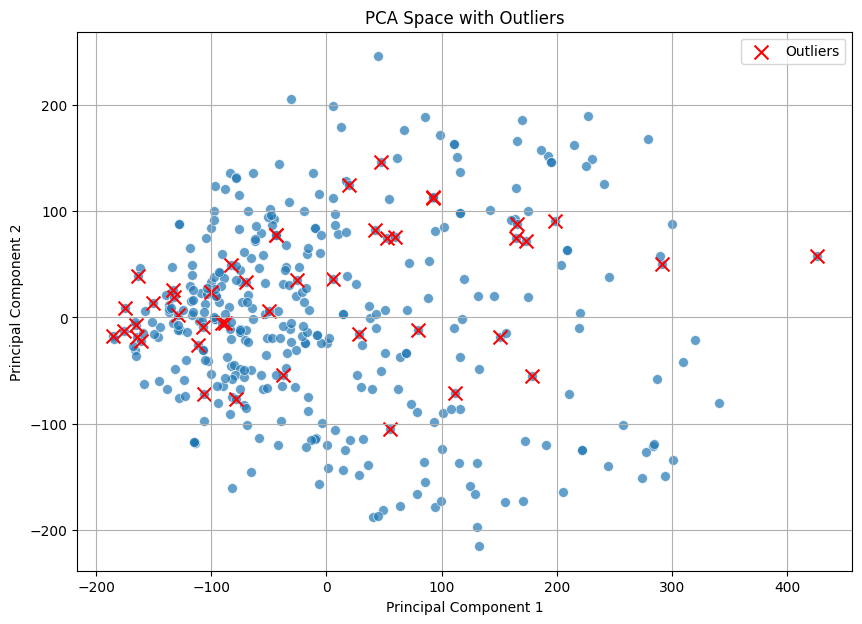

In [7]:
# Print detected outlier file names
#print(outliers)
print("\nOutlier Mesh Files:")
for i in outliers:
    print(occupancy_files[i])

# ------ Visualizations ------
plt.figure(figsize=(10, 7))

# PCA + KMeans
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], palette="viridis", s=50, alpha=0.7)
plt.scatter(principal_components[outliers, 0], principal_components[outliers, 1], color="red", marker="x", s=100, label="Outliers")

# Plot K-Means cluster centers
#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75, marker='P', label="Cluster Centers")

plt.title("PCA Space with Outliers")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)

# Optionally save the plot
#plt.savefig("kmeans_pca_clustering.png")
plt.show()

In [10]:
mesh_dir = '/Users/User/Documents/Project_JEB/JEB_Data/SimJEB_surfmesh_(obj)/'
outlier_files = [occupancy_files[i] for i in outliers]
print(len(outlier_files))
print("\nOutlier Mesh Files:")
for file in outlier_files:
    print(file)

plotter = pv.Plotter()
#colors = pv.get_cmap("coolwarm", len(outlier_files))  # Assign different colors

for i, file in enumerate(outlier_files):
    mesh_file = os.path.splitext(file)[0] + ".obj"  # Match with .obj filenames
    mesh_path = os.path.join(mesh_dir, mesh_file)
    
    if os.path.exists(mesh_path):
        mesh = pv.read(mesh_path)
        plotter.add_mesh(mesh, opacity=0.5, show_edges=True)
        plotter.add_text(f"Outlier {i+1}", font_size=10)

plotter.show()

45

Outlier Mesh Files:
34.npy
493.npy
336.npy
35.npy
518.npy
23.npy
335.npy
255.npy
533.npy
25.npy
30.npy
125.npy
142.npy
551.npy
40.npy
425.npy
394.npy
356.npy
69.npy
197.npy
86.npy
384.npy
50.npy
623.npy
87.npy
163.npy
62.npy
407.npy
413.npy
348.npy
412.npy
362.npy
411.npy
165.npy
400.npy
428.npy
59.npy
71.npy
576.npy
614.npy
9.npy
167.npy
205.npy
106.npy
310.npy


Widget(value='<iframe src="http://localhost:56663/index.html?ui=P_0x1659eb0e0_0&reconnect=auto" class="pyvista…

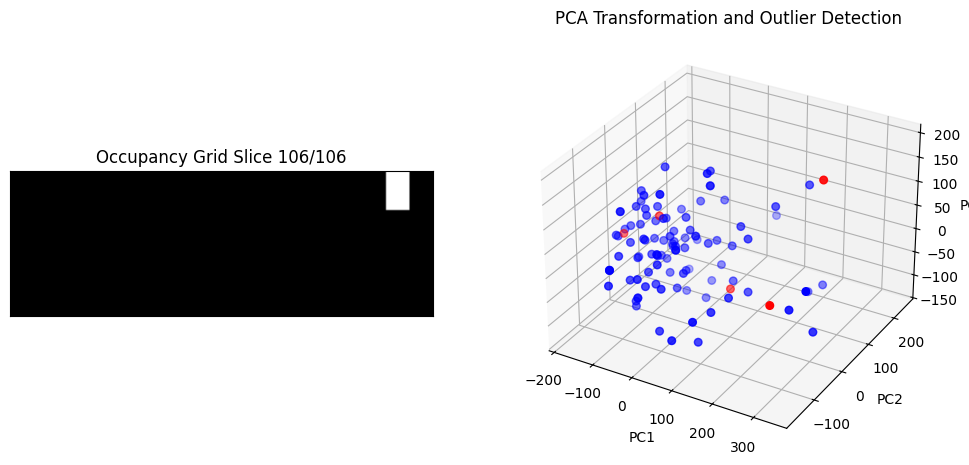

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from scipy.spatial.distance import mahalanobis
from scipy.stats import zscore

# Directory containing occupancy grids
occupancy_dir = "/Users/User/Documents/Project_JEB/JEB_Data/SimJEB_Occupancy_Grids/"
occupancy_files = [f for f in os.listdir(occupancy_dir) if f.endswith(".npy")]

# Find the largest grid shape
max_shape = (0, 0, 0)
for file in occupancy_files:
    grid = np.load(os.path.join(occupancy_dir, file))
    max_shape = tuple(max(s1, s2) for s1, s2 in zip(max_shape, grid.shape))

# Function to pad grids
def pad_grid(grid, max_shape):
    pad_width = [(0, max_s - s) for s, max_s in zip(grid.shape, max_shape)]
    return np.pad(grid, pad_width, mode='constant', constant_values=0)

# Load and pad grids
occupancy_data = []
original_grids = []
for file in occupancy_files:
    grid = np.load(os.path.join(occupancy_dir, file))
    padded_grid = pad_grid(grid, max_shape)
    occupancy_data.append(padded_grid.flatten())
    original_grids.append(grid)  # Keep original for visualization

occupancy_data = np.array(occupancy_data)

# Perform PCA
pca = PCA(n_components=20)
principal_components = pca.fit_transform(occupancy_data)

# Compute Mahalanobis distance for outlier detection
cov_matrix = np.cov(principal_components.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)
mean_vec = np.mean(principal_components, axis=0)

mahal_distances = np.array([
    mahalanobis(pc, mean_vec, inv_cov_matrix) for pc in principal_components
])

threshold = 1.5
z_scores = zscore(mahal_distances)
outliers = np.where(np.abs(z_scores) > threshold)[0]

# Select a sample occupancy grid for visualization
sample_grid = original_grids[0]
grid_slices = [sample_grid[:, :, i] for i in range(sample_grid.shape[2])]

# Create Figure and Axes
fig = plt.figure(figsize=(12, 6))

# Left: Occupancy Grid Evolution (2D Slices)
ax1 = fig.add_subplot(121)
ax1.set_title("Occupancy Grid Evolution")
ax1.set_xticks([])
ax1.set_yticks([])
grid_im = ax1.imshow(grid_slices[0], cmap="gray")

# Right: PCA Projection with Outlier Detection
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_title("PCA Transformation and Outlier Detection")
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")
ax2.set_zlabel("PC3")

scatter = ax2.scatter([], [], [], c=[], s=30)

# Update Function for Animation
def update(frame):
    # Update Occupancy Grid Evolution (Left)
    ax1.set_title(f"Occupancy Grid Slice {frame + 1}/{len(grid_slices)}")
    grid_im.set_data(grid_slices[frame])

    # Update PCA Scatter Plot (Right)
    ax2.clear()
    ax2.set_title("PCA Transformation and Outlier Detection")
    ax2.set_xlabel("PC1")
    ax2.set_ylabel("PC2")
    ax2.set_zlabel("PC3")

    current_data = principal_components[:frame]
    current_colors = ["red" if i in outliers else "blue" for i in range(frame)]
    ax2.scatter(current_data[:, 0], current_data[:, 1], current_data[:, 2], c=current_colors, s=30)

    return grid_im, scatter

# Create Animation
ani = animation.FuncAnimation(fig, update, frames=len(grid_slices), interval=200, repeat=True)

# Save animation as GIF
ani.save("occupancy_pca_outliers.gif", writer="pillow", fps=10)

plt.show()


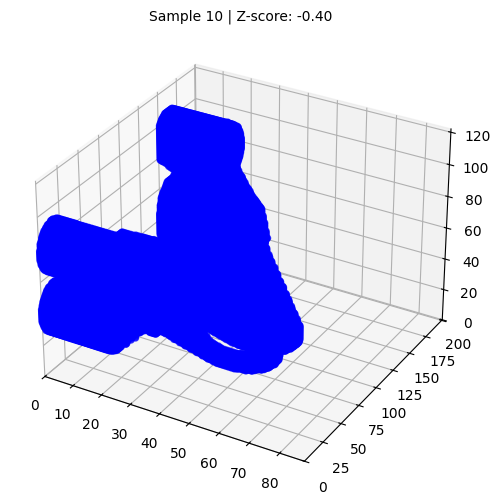

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import mahalanobis
from scipy.stats import zscore
from sklearn.decomposition import PCA

# Directory containing saved occupancy grids
occupancy_dir = "/Users/User/Documents/Project_JEB/JEB_Data/SimJEB_Occupancy_Grids/"

# Load all occupancy grids
occupancy_files = [f for f in os.listdir(occupancy_dir) if f.endswith(".npy")]
occupancy_data = []

# Find the largest grid shape
max_shape = (0, 0, 0)  # Placeholder for (x, y, z) dimensions
for file in occupancy_files:
    grid = np.load(os.path.join(occupancy_dir, file))
    max_shape = tuple(max(s1, s2) for s1, s2 in zip(max_shape, grid.shape))

# Function to pad grids to max_shape
def pad_grid(grid, max_shape):
    pad_width = [(0, max_s - s) for s, max_s in zip(grid.shape, max_shape)]
    return np.pad(grid, pad_width, mode='constant', constant_values=0)

# Load and pad grids
for file in occupancy_files:
    grid = np.load(os.path.join(occupancy_dir, file))
    padded_grid = pad_grid(grid, max_shape)
    occupancy_data.append(padded_grid.flatten())  # Flatten to 1D vector

occupancy_data = np.array(occupancy_data)  # Convert to 1D NumPy array

# Perform PCA
pca = PCA(n_components=100)  
principal_components = pca.fit_transform(occupancy_data)

# Outlier Detection using Mahalanobis Distance
cov_matrix = np.cov(principal_components.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)
mean_vec = np.mean(principal_components, axis=0)

mahal_distances = np.array([
    mahalanobis(pc, mean_vec, inv_cov_matrix) for pc in principal_components
])

# Compute Z-scores
z_scores = zscore(mahal_distances)

# Set threshold for outliers
threshold = 1.5
outliers = np.where(np.abs(z_scores) > threshold)[0]

# Select 10 random grids for animation
np.random.seed(42)
sample_indices = np.random.choice(len(occupancy_data), 10, replace=False)

# Function to plot a 3D voxel representation
def plot_grid(ax, grid, title, is_outlier):
    ax.clear()
    ax.set_title(title, fontsize=10)
    
    # Convert flat array back to 3D
    grid_3d = grid.reshape(max_shape)
    filled = grid_3d > 0  # Binary mask for filled voxels
    x, y, z = np.where(filled)

    # Highlight outliers in red
    color = 'red' if is_outlier else 'blue'
    ax.scatter(x, y, z, c=color, alpha=0.7, marker='o')

    ax.set_xlim([0, max_shape[0]])
    ax.set_ylim([0, max_shape[1]])
    ax.set_zlim([0, max_shape[2]])

# Create animation
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

def update(frame):
    idx = sample_indices[frame]
    grid = occupancy_data[idx]
    is_outlier = idx in outliers
    title = f"Sample {frame+1} | Z-score: {z_scores[idx]:.2f}"
    plot_grid(ax, grid, title, is_outlier)

ani = animation.FuncAnimation(fig, update, frames=len(sample_indices), interval=2000)

# Save as GIF
ani.save("occupancy_grids_animation.gif", writer="pillow", fps=1)

plt.show()


In [4]:
import os
import numpy as np
import pyvista as pv
import matplotlib.pyplot as plt
import imageio
from scipy.spatial.distance import mahalanobis
from scipy.stats import zscore
from sklearn.decomposition import PCA

# Directory containing saved occupancy grids
occupancy_dir = "/Users/User/Documents/Project_JEB/JEB_Data/SimJEB_Occupancy_Grids/"

# Load all occupancy grids
occupancy_files = [f for f in os.listdir(occupancy_dir) if f.endswith(".npy")]
occupancy_data = []

# Find the largest grid shape
max_shape = (0, 0, 0)  # Placeholder for (x, y, z) dimensions
for file in occupancy_files:
    grid = np.load(os.path.join(occupancy_dir, file))
    max_shape = tuple(max(s1, s2) for s1, s2 in zip(max_shape, grid.shape))

# Function to pad grids to max_shape
def pad_grid(grid, max_shape):
    pad_width = [(0, max_s - s) for s, max_s in zip(grid.shape, max_shape)]
    return np.pad(grid, pad_width, mode='constant', constant_values=0)

# Load and pad grids
for file in occupancy_files:
    grid = np.load(os.path.join(occupancy_dir, file))
    padded_grid = pad_grid(grid, max_shape)
    occupancy_data.append(padded_grid.flatten())  # Flatten to 1D vector

occupancy_data = np.array(occupancy_data)  # Convert to 1D NumPy array

# Perform PCA
pca = PCA(n_components=100)  
principal_components = pca.fit_transform(occupancy_data)

# Outlier Detection using Mahalanobis Distance
cov_matrix = np.cov(principal_components.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)
mean_vec = np.mean(principal_components, axis=0)

mahal_distances = np.array([
    mahalanobis(pc, mean_vec, inv_cov_matrix) for pc in principal_components
])

# Compute Z-scores
z_scores = zscore(mahal_distances)

# Set threshold for outliers
threshold = 1.5
outliers = np.where(np.abs(z_scores) > threshold)[0]

# Select 10 random grids for animation
np.random.seed(42)
sample_indices = np.random.choice(len(occupancy_data), 20, replace=False)

# PyVista Plotter
plotter = pv.Plotter(off_screen=True)

# Function to visualize occupancy grids using PyVista
def plot_grid(grid, z_score, is_outlier, frame_id):
    plotter.clear()
    
    # Convert flat array back to 3D
    grid_3d = grid.reshape(max_shape)
    x, y, z = np.where(grid_3d > 0)  # Extract occupied voxel indices

    # Create point cloud
    points = np.column_stack((x, y, z))
    cloud = pv.PolyData(points)

    # Assign color (red for outliers, blue for normal)
    color = "red" if is_outlier else "blue"

    # Add points to the plot
    plotter.add_mesh(cloud, color=color, point_size=10, render_points_as_spheres=True)

    # Add title with Z-score
    title_text = f"Sample {frame_id+1} | Z-score: {z_score:.2f}"
    plotter.add_text(title_text, font_size=10)

    # Save frame
    frame_filename = f"frame_{frame_id}.png"
    plotter.screenshot(frame_filename)
    return frame_filename

# Generate animation frames
frame_files = []
for i, idx in enumerate(sample_indices):
    grid = occupancy_data[idx]
    is_outlier = idx in outliers
    frame_file = plot_grid(grid, z_scores[idx], is_outlier, i)
    frame_files.append(frame_file)

# Create GIF animation
gif_filename = "occupancy_grids_animation.gif"
imageio.mimsave(gif_filename, [imageio.imread(frame) for frame in frame_files], duration=3)

# Cleanup temporary frames
for frame in frame_files:
    os.remove(frame)

print(f"Animation saved as {gif_filename}")


/Users/User/Documents/Project_JEB/.venv/lib/python3.12/site-packages/pyvista/core/utilities/points.py:55: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(
/var/folders/j3/nf3_zjf95vb6pp_w3_1bds0w0000gn/T/ipykernel_1437/1404836664.py:100: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imageio.mimsave(gif_filename, [imageio.imread(frame) for frame in frame_files], duration=3)


Animation saved as occupancy_grids_animation.gif
